<a href="https://colab.research.google.com/github/Buntariga2545/Project/blob/main/TSV_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
data = pd.read_excel('/content/drive/MyDrive/Paper/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_2', usecols=lambda x: 'Unnamed' not in x,)
data

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,ความชื้น,กระแสลม,...,Clo,Met,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter,เพศ_ชาย,เพศ_หญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


#Spitt data

##TSV 7

In [37]:
fo_mapping = {
    -2 :0,
    -1 :1,
    0 : 2,
    1 : 3,
    2 : 4,
    3 : 5,
}

data['TSV7'] = data['Thermal_sensation_Vote'].map(fo_mapping)

In [40]:
data.TSV7.value_counts()

2    59
3    53
1    39
4    22
5    16
0     4
Name: TSV7, dtype: int64

###แบ่งข้อมูลโดยใช้ 5-fold แล้วจัดการ imbalance class ด้วย smote (TSV7)

In [74]:
X = data.drop(['Thermal_acceptance','Thermal_sensation_Vote'], axis = 1)
#y = data['Thermal_acceptance']
y2 = data['TSV7']

In [75]:
import numpy as np
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# วนลูปผ่าน K-Fold
for train_index, test_index in kf.split(X):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

    # ทำมาตรฐานข้อมูล
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
    smote = SMOTE(k_neighbors=2, random_state=42)
    X_train_res, y2_train_res = smote.fit_resample(X_train_scaled, y2_train)

    print(f"Training set size after resampling: {X_train_res.shape}")
    print(f"Test set size: {X_test_scaled.shape}")

Training set size after resampling: (270, 27)
Test set size: (39, 27)
Training set size after resampling: (306, 27)
Test set size: (39, 27)
Training set size after resampling: (288, 27)
Test set size: (39, 27)
Training set size after resampling: (270, 27)
Test set size: (38, 27)
Training set size after resampling: (288, 27)
Test set size: (38, 27)


##TSV 2

In [140]:
fo_mapping = {
    -2 :-2,
    -1 :-1,
    0 : 0,
    1 : 1,
    2 : 2,
    3 : 3,
}

data['TSV2'] = data['Thermal_sensation_Vote'].map(fo_mapping)

In [154]:
data['TSV2'][data['TSV2']==-1] = 1
data['TSV2'][data['TSV2']==0] = 1
data['TSV2'][data['TSV2']==1] = 1

data['TSV2'][data['TSV2']==2] = 2
data['TSV2'][data['TSV2']==3] = 2

<ipython-input-154-d1435c96ad8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-154-d1435c96ad8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-154-d1435c96ad8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-154-d1435c96ad8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [155]:
fo_mapping = {
    1 : 0,
    2 : 1,
}

data['TSV2'] = data['TSV2'].map(fo_mapping)

In [181]:
data.TSV2.value_counts()

#data['TSV2'][data['TSV2']==-1].dropna(axis=0)

0    151
1     38
Name: TSV2, dtype: int64

In [149]:
data['TSV2'][data['TSV2']==-2].dropna(axis=0)

28   -2
36   -2
43   -2
45   -2
Name: TSV2, dtype: int64

In [152]:
data.drop([28, 36, 43, 45], axis = 0, inplace=True)

###แบ่งข้อมูลโดยใช้ 5-fold แล้วจัดการ imbalance class ด้วย smote (TSV2)

In [182]:
X = data.drop(['Thermal_acceptance', 'Thermal_sensation_Vote', 'TSV2'], axis = 1)
y3 = data['TSV2']

In [183]:
import numpy as np
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# ตั้งค่าพารามิเตอร์สำหรับ K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# วนลูปผ่าน K-Fold
for train_index, test_index in kf.split(X):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y3_train, y3_test = y3.iloc[train_index], y3.iloc[test_index]

    # ทำมาตรฐานข้อมูล
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
    smote = SMOTE(k_neighbors=2, random_state=42)
    X_train_res, y3_train_res = smote.fit_resample(X_train_scaled, y3_train)

    print(f"Training set size after resampling: {X_train_res.shape}")
    print(f"Test set size: {X_test_scaled.shape}")

Training set size after resampling: (234, 26)
Test set size: (38, 26)
Training set size after resampling: (240, 26)
Test set size: (38, 26)
Training set size after resampling: (236, 26)
Test set size: (38, 26)
Training set size after resampling: (248, 26)
Test set size: (38, 26)
Training set size after resampling: (250, 26)
Test set size: (37, 26)


In [ ]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

##SVM

###TSV 7 ค่า

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
svm_grid.fit(X_train_res, y2_train_res)
print("best_params :",svm_grid.best_params_)
print("accuracy :",svm_grid.best_score_)

best_params : {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
accuracy : 0.9930429522081065


In [47]:
svm = SVC(C= 100,gamma= 0.01, kernel='sigmoid')

svm_pred = svm.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y_test,y_pred))

print('MSE_train:', format(mean_squared_error(y2_train_res, svm_pred.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, svm_pred.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, svm_pred.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, svm_pred.predict(X_test_scaled))))

MSE_train: 0.003472222222222222
MSE_test: 0.02631578947368421
MAE_train: 0.003472222222222222
MAE_test: 0.02631578947368421


###TSV 3 ค่า

In [159]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
svm_grid.fit(X_train_res, y3_train_res)
print("best_params :",svm_grid.best_params_)
print("accuracy :",svm_grid.best_score_)

best_params : {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.9119999999999999


In [160]:
svm = SVC(C= 0.5, gamma= 0.1, kernel='rbf')

svm_pred = svm.fit(X_train_res, y3_train_res)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y_test,y_pred))

print('MSE_train:', format(mean_squared_error(y3_train_res, svm_pred.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y3_test, svm_pred.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y3_train_res, svm_pred.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y3_test, svm_pred.predict(X_test_scaled))))

MSE_train: 0.024
MSE_test: 0.13513513513513514
MAE_train: 0.024
MAE_test: 0.13513513513513514


###Plot SVM

TSV 2 ค่า

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


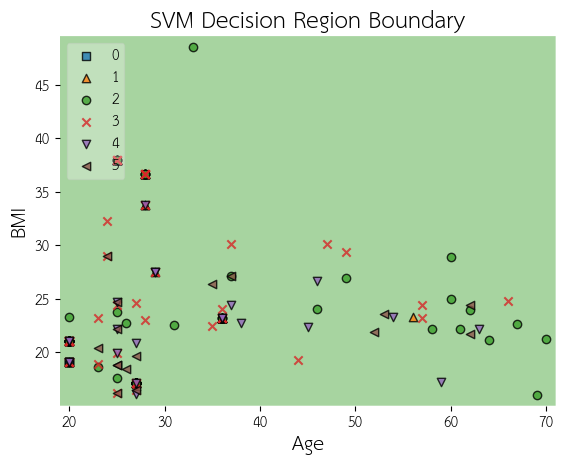

In [56]:
import numpy as np
import pandas as pd
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Fit Support Vector Machine Classifier
X = data[['Age', 'BMI']]
y = data['TSV7']

clf = svm.SVC(C= 100,gamma= 0.01, kernel='sigmoid')
clf.fit(X, y)

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values,
                      y=y.values,
                      clf=clf,
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.w

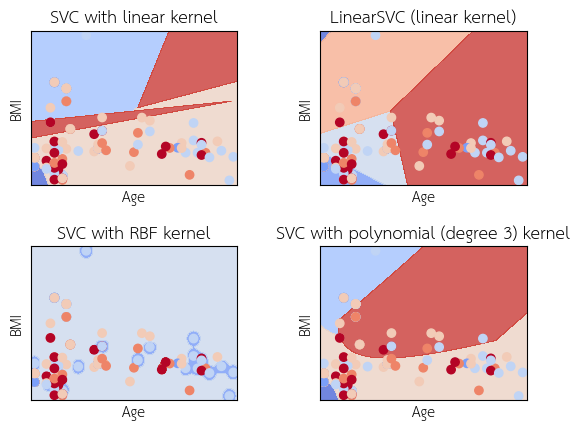

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

X = data[['Age', 'BMI']]
y = data['TSV7']
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
#x_min, x_max = X.min() - 1, X.max() + 1
#y_min, y_max = X.min() - 1, X.max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['BMI'].min() - 1, X['BMI'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X['Age'], X['BMI'], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


Best parameters for SVM: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.47      0.38      0.42        39
           2       0.49      0.53      0.51        59
           3       0.35      0.64      0.45        53
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00        16

    accuracy                           0.41       193
   macro avg       0.22      0.26      0.23       193
weighted avg       0.34      0.41      0.36       193



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names


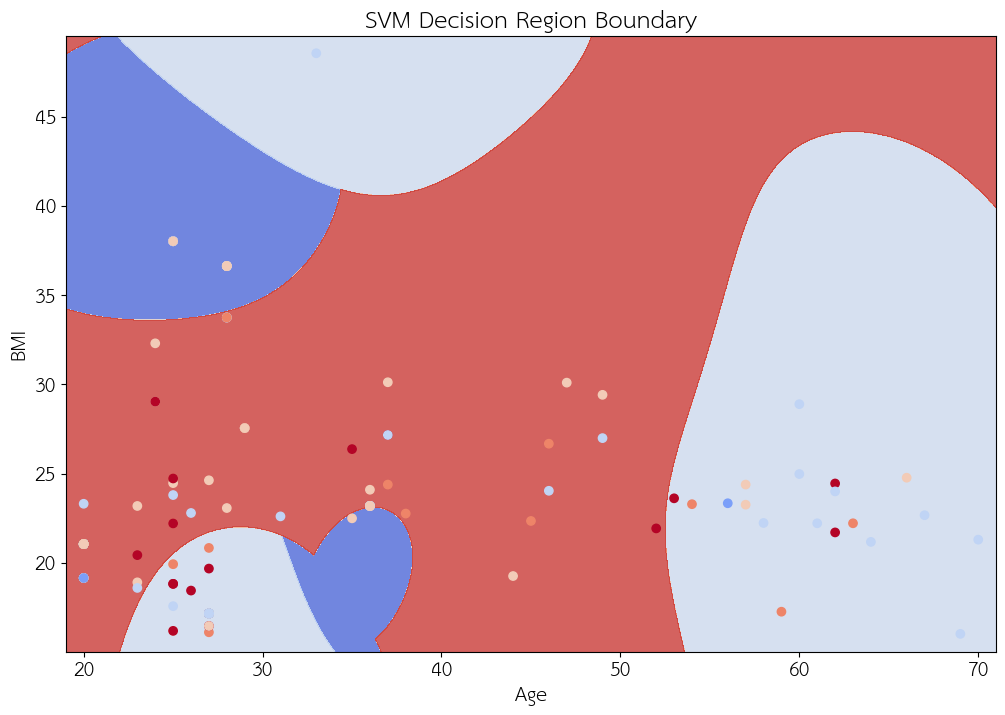

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

X = data[['Age', 'BMI']]
y = data['TSV7']

# แบ่งข้อมูลเป็น Train set และ Test set
#X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.3, random_state=0)

# กำหนดพารามิเตอร์ที่เป็นไปได้ของ SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']}

# สร้าง Grid Search object สำหรับ SVM
svm_grid_search = GridSearchCV(SVC(random_state=0), param_grid, cv=5)

# ปรับพารามิเตอร์ของ SVM ด้วย Grid Search
svm_grid_search.fit(X, y)

# แสดงค่าพารามิเตอร์ที่ดีที่สุดสำหรับ SVM
print('Best parameters for SVM:', svm_grid_search.best_params_)

# ทำนายผลการจัดกลุ่มสำหรับ Test set ด้วยโมเดล SVM ที่ดีที่สุด
y_pred = svm_grid_search.predict(X)

# แสดงผลการทดสอบ
print(classification_report(y, y_pred))

# แสดง Decision boundary ของโมเดล SVM ที่ดีที่สุด
svc = svm_grid_search.best_estimator_
svc.fit(X, y)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X['Age'], X['BMI'], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('SVM Decision Region Boundary')
plt.show()

#cmap=plt.cm.RdYlBu

TSV 2 ค่า

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names


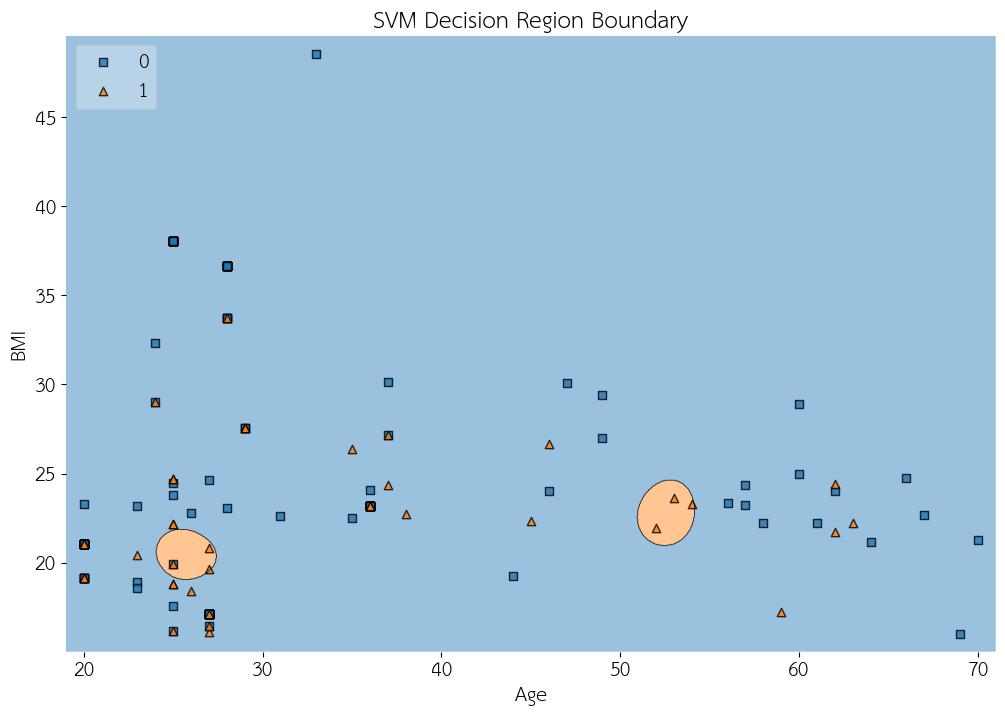

In [162]:
# Fit Support Vector Machine Classifier
X = data[['Age', 'BMI']]
y = data['TSV2']

clf = svm.SVC(C= 0.5, gamma= 0.1, kernel='rbf')
clf.fit(X, y)

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values,
                      y=y.values,
                      clf=clf,
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names


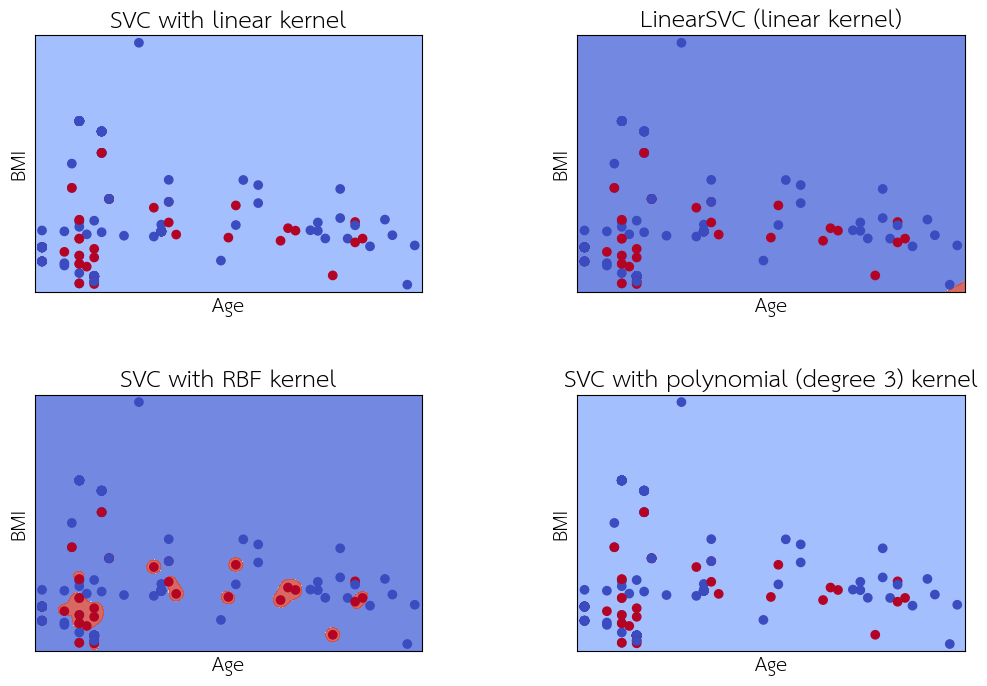

In [163]:
X = data[['Age', 'BMI']]
y = data['TSV2']
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
#x_min, x_max = X.min() - 1, X.max() + 1
#y_min, y_max = X.min() - 1, X.max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['BMI'].min() - 1, X['BMI'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X['Age'], X['BMI'], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Best parameters for SVM: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       151
           1       0.00      0.00      0.00        38

    accuracy                           0.80       189
   macro avg       0.40      0.50      0.44       189
weighted avg       0.64      0.80      0.71       189



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names


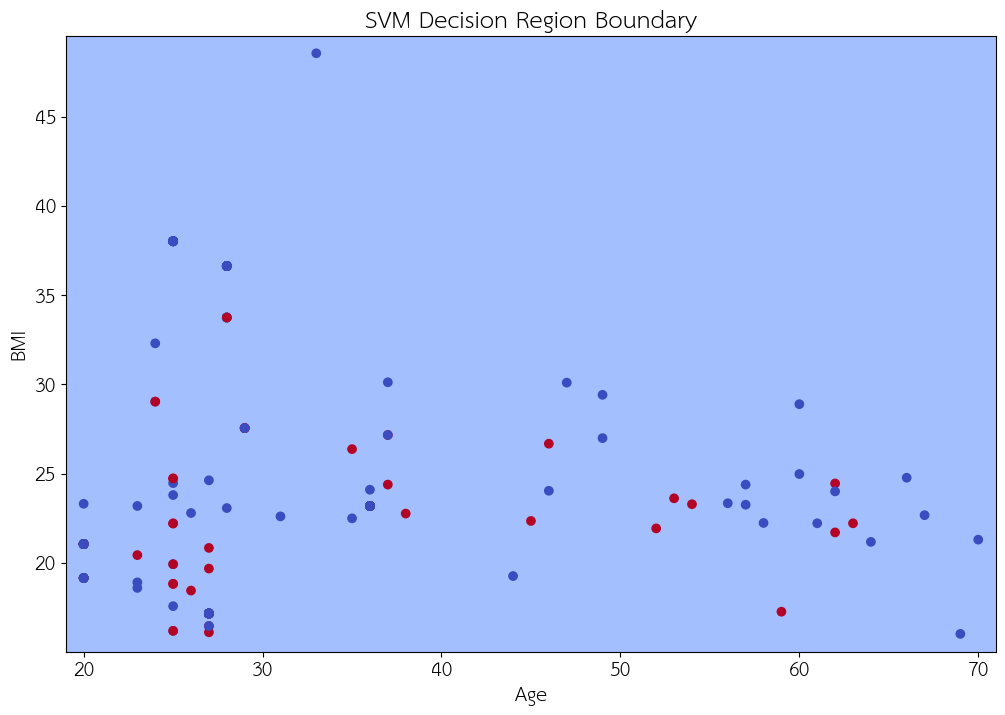

In [164]:
X = data[['Age', 'BMI']]
y = data['TSV2']

# แบ่งข้อมูลเป็น Train set และ Test set
#X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.3, random_state=0)

# กำหนดพารามิเตอร์ที่เป็นไปได้ของ SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']}

# สร้าง Grid Search object สำหรับ SVM
svm_grid_search = GridSearchCV(SVC(random_state=0), param_grid, cv=5)

# ปรับพารามิเตอร์ของ SVM ด้วย Grid Search
svm_grid_search.fit(X, y)

# แสดงค่าพารามิเตอร์ที่ดีที่สุดสำหรับ SVM
print('Best parameters for SVM:', svm_grid_search.best_params_)

# ทำนายผลการจัดกลุ่มสำหรับ Test set ด้วยโมเดล SVM ที่ดีที่สุด
y_pred = svm_grid_search.predict(X)

# แสดงผลการทดสอบ
print(classification_report(y, y_pred))

# แสดง Decision boundary ของโมเดล SVM ที่ดีที่สุด
svc = svm_grid_search.best_estimator_
svc.fit(X, y)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X['Age'], X['BMI'], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('SVM Decision Region Boundary')
plt.show()

##SVR

In [76]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

#mean_squared_error(actual_values, predicted_values)
# taking root of mean squared error
#root_mean_squared_error = sqrt(mean_squared_error)

###TSV 7 ค่า

In [77]:
#GridSearchCV for SVR
from sklearn.svm import SVR

C = np.array([0.001, 0.01, 0.1, 1, 10])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

gs = GridSearchCV(SVR(), param_grid = space, scoring = 'r2', cv = 10, n_jobs = -1)
ge_results = gs.fit(X_train_res, y2_train_res)
print("Best parameters :", ge_results.best_score_)
print("Best accuracy :", ge_results.best_params_)
print('R_Square:', format(ge_results.best_score_))
print('Best parameters:', format(ge_results.best_params_))

Best parameters : 0.8999999436293503
Best accuracy : {'C': 1.0, 'epsilon': 0, 'kernel': 'linear'}
R_Square: 0.8999999436293503
Best parameters: {'C': 1.0, 'epsilon': 0, 'kernel': 'linear'}


In [78]:
svr_reg = SVR(C = 1, kernel = 'linear', epsilon = 0)

# Train the model
results = svr_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = svr_reg.predict(X_test_scaled)

print('MSE_train:', format(mean_squared_error(y2_train_res, results.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, results.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, results.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, results.predict(X_test_scaled))))

MSE_train: 3.659448290561049e-08
MSE_test: 4.0027710468179985e-08
MAE_train: 0.0001602597565837869
MAE_test: 0.00016211852612204125


###TSV 2 ค่า

In [184]:
C = np.array([0.001, 0.01, 0.1, 1, 10])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

gs = GridSearchCV(SVR(), param_grid = space, scoring = 'r2', cv = 10, n_jobs = -1)
ge_results = gs.fit(X_train_res, y3_train_res)
print("Best parameters :", ge_results.best_score_)
print("Best accuracy :", ge_results.best_params_)
print('R_Square:', format(ge_results.best_score_))
print('Best parameters:', format(ge_results.best_params_))

Best parameters : 0.26434669657630705
Best accuracy : {'C': 10.0, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
R_Square: 0.26434669657630705
Best parameters: {'C': 10.0, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}


In [185]:
svr_reg = SVR(C = 10, kernel = 'rbf', epsilon = 0.01, gamma = 0.1)

# Train the model
results = svr_reg.fit(X_train_res, y3_train_res)

# Make predictions on the test set
y_pred = svr_reg.predict(X_test_scaled)

print('MSE_train:', format(mean_squared_error(y3_train_res, results.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y3_test, results.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y3_train_res, results.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y3_test, results.predict(X_test_scaled))))

MSE_train: 8.376022730383855e-05
MSE_test: 0.09338513088074316
MAE_train: 0.008813074556836095
MAE_test: 0.20338738694460085


###Plot SVR

##XGBOOST

###TSV 7 ค่า

In [63]:
import xgboost as xgb

param_dist = {
    'max_depth': [5, 9, 10, 14],
    'subsample': [1, 0.8, 0.6, 0.3],
    'colsample_bytree': [1, 0.8, 0.6, 0.3]
}

In [64]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

#Creating an XGBoost regressor
model = xgb.XGBRegressor()
xgbr = GridSearchCV(model, param_dist)

#Training the model on the training data
xgb_reg = xgbr.fit(X_train_res, y2_train_res)

print("Best parameters :", xgb_reg.best_score_)
print("Best accuracy :", xgb_reg.best_params_)

Best parameters : 0.9999999717394061
Best accuracy : {'colsample_bytree': 1, 'max_depth': 5, 'subsample': 1}


In [65]:
#Making predictions on the test set
predictions = xgbr.predict(X_test_scaled)

xgb_reg = xgb.XGBRegressor(colsample_bytree = 1, max_depth = 5, subsample = 1)

# Train the model
result = xgb_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test_scaled)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y2_train_res, xgb_reg.predict(X_train_res))
r2_train = r2_score(y2_train_res, xgb_reg.predict(X_train_res))
mae_train = mean_absolute_error(y2_train_res, xgb_reg.predict(X_train_res))

mse_test = mean_squared_error(y2_test, predictions)
r2_test = r2_score(y2_test, predictions)
mae_test = mean_absolute_error(y2_test, predictions)

print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)
print("Mean Absolute Error:", mae_train)

print("Mean Squared Error:", mse_test)
print("R-squared Score:", r2_test)
print("Mean Absolute Error:", mae_test)

Mean Squared Error: 4.279065009716753e-09
R-squared Score: 0.999999998532892
Mean Absolute Error: 4.819890212578078e-05
Mean Squared Error: 1.2407792688033002e-09
R-squared Score: 0.9999999992303757
Mean Absolute Error: 2.404576853701943e-05


###TSV 2 ค่า

In [186]:
import xgboost as xgb

param_dist = {
    'max_depth': [5, 9, 10, 14],
    'subsample': [1, 0.8, 0.6, 0.3],
    'colsample_bytree': [1, 0.8, 0.6, 0.3]
}

In [187]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Creating an XGBoost regressor
model = xgb.XGBRegressor()
xgbr = GridSearchCV(model, param_dist)

#Training the model on the training data
xgb_reg = xgbr.fit(X_train_res, y3_train_res)

print("Best parameters :", xgb_reg.best_score_)
print("Best accuracy :", xgb_reg.best_params_)

Best parameters : 0.2998222906403134
Best accuracy : {'colsample_bytree': 0.3, 'max_depth': 5, 'subsample': 0.6}


In [188]:
#Making predictions on the test set
predictions = xgbr.predict(X_test_scaled)

xgb_reg = xgb.XGBRegressor(colsample_bytree = 0.3, max_depth = 5, subsample = 0.6)

# Train the model
result = xgb_reg.fit(X_train_res, y3_train_res)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test_scaled)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y3_train_res, xgb_reg.predict(X_train_res))
r2_train = r2_score(y3_train_res, xgb_reg.predict(X_train_res))
mae_train = mean_absolute_error(y3_train_res, xgb_reg.predict(X_train_res))

mse_test = mean_squared_error(y3_test, predictions)
r2_test = r2_score(y3_test, predictions)
mae_test = mean_absolute_error(y3_test, predictions)

print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)
print("Mean Absolute Error:", mae_train)

print("Mean Squared Error:", mse_test)
print("R-squared Score:", r2_test)
print("Mean Absolute Error:", mae_test)

Mean Squared Error: 5.372407736013738e-05
R-squared Score: 0.9997851036905594
Mean Absolute Error: 0.004887974455661606
Mean Squared Error: 0.09248599159331336
R-squared Score: 0.5572960752054334
Mean Absolute Error: 0.1830007261691011


###Plot XGBOOST

TSV 7 ค่า

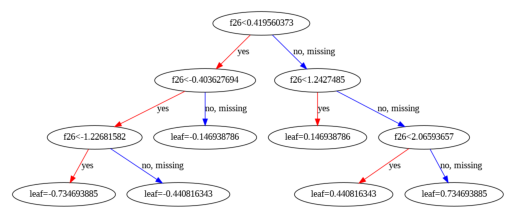

In [66]:
# plot decision tree
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

# fit model no training data
model = xgb.XGBRegressor()
xgb_reg = model.fit(X_train_res, y2_train_res)
# plot single tree
plot_tree(xgb_reg)
plt.show()

TSV 2 ค่า

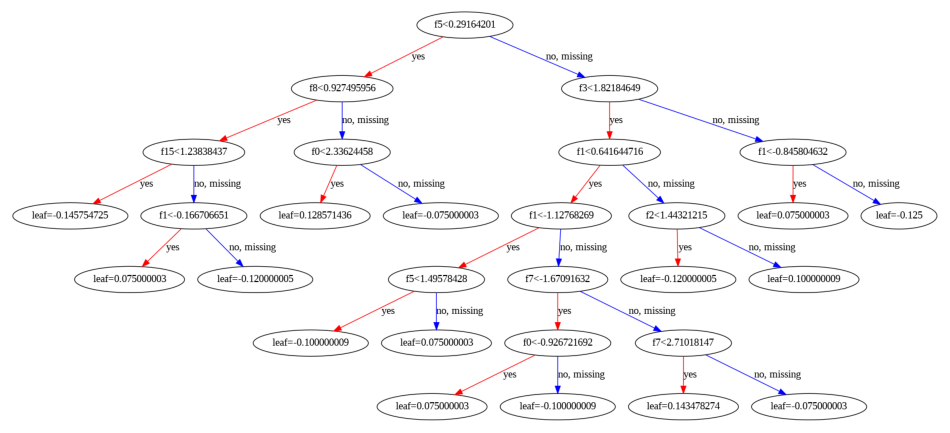

In [189]:
# plot decision tree
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

# fit model no training data
model = xgb.XGBRegressor()
xgb_reg = model.fit(X_train_res, y3_train_res)
# plot single tree
plot_tree(xgb_reg)
plt.show()

##regression

In [67]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# mean_squared_error module for applying RMSE
from sklearn.metrics import mean_squared_error as mse

###Lasso

###TSV 7 ค่า

In [69]:
from sklearn import datasets
from sklearn.linear_model import LassoCV

# Create an instance of Lasso Regression implementation
lasso_cv = LassoCV(cv=5)

# Fit the Lasso model
lasso_cv.fit(X_train_res, y2_train_res)

LassoCV(cv=5)

In [70]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train_res, y2_train_res)

# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

print("Best parameters :", lasso_cv.best_params_)
print("Best accuracy :", lasso_cv.best_score_)
print('R_Square:', format(lasso_cv.best_score_))
print('Best parameters:', format(lasso_cv.best_params_))

Best Parameters: {'alpha': 0.001}
Best Score: 0.9999978423581662
Best parameters : {'alpha': 0.001}
Best accuracy : 0.9999978423581662
R_Square: 0.9999978423581662
Best parameters: {'alpha': 0.001}


In [71]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Fit Lasso regression model
lasso = Lasso(alpha=0.001)
lasso_reg = lasso.fit(X_train_res, y2_train_res)

# Evaluate model performance on test set
y_pred = lasso.predict(X_test_scaled)

# Model Score
print("Model Score: ", lasso.score(X_test_scaled, y2_test))

# Lasso Coefficient
lasso.coef_

print('MSE_train:', format(mean_squared_error(y2_train_res, lasso_reg.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, lasso_reg.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, lasso_reg.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, lasso_reg.predict(X_test_scaled))))

Model Score:  0.9999998258578172
MSE_train: 5.059586740005498e-07
MSE_test: 2.8075000106197123e-07
MAE_train: 0.0006247487311601038
MAE_test: 0.0004493806662730856


###TSV 2 ค่า

In [190]:
# Create an instance of Lasso Regression implementation
lasso_cv = LassoCV(cv=5)

# Fit the Lasso model
lasso_cv.fit(X_train_res, y3_train_res)

LassoCV(cv=5)

In [191]:
# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train_res, y3_train_res)

# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

print("Best parameters :", lasso_cv.best_params_)
print("Best accuracy :", lasso_cv.best_score_)
print('R_Square:', format(lasso_cv.best_score_))
print('Best parameters:', format(lasso_cv.best_params_))

Best Parameters: {'alpha': 0.01}
Best Score: -0.5199629606065561
Best parameters : {'alpha': 0.01}
Best accuracy : -0.5199629606065561
R_Square: -0.5199629606065561
Best parameters: {'alpha': 0.01}


In [192]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.01)
lasso_reg = lasso.fit(X_train_res, y3_train_res)

# Evaluate model performance on test set
y_pred = lasso.predict(X_test_scaled)

# Model Score
print("Model Score: ", lasso.score(X_test_scaled, y3_test))

# Lasso Coefficient
lasso.coef_

print('MSE_train:', format(mean_squared_error(y3_train_res, lasso_reg.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y3_test, lasso_reg.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y3_train_res, lasso_reg.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y3_test, lasso_reg.predict(X_test_scaled))))

Model Score:  0.5893412077982284
MSE_train: 0.08187665405298117
MSE_test: 0.08579139121234963
MAE_train: 0.22036120057601635
MAE_test: 0.2078918983262823


###Multiple Linear Regression

###TSV 7 ค่า

In [72]:
from sklearn import datasets, linear_model, metrics

In [ ]:
#X = data.drop(['Thermal_acceptance', 'Thermal_sensation_Vote', 'TSV3'], axis =1)
#y3 = data['TSV3']

#regr = linear_model.LinearRegression()
#regr.fit(X, y3)

#print(regr.coef_)

In [80]:
features = X.columns
features

Index(['Age', 'BMI', 'Temp', 'RH', 'V', 'อุณหภูมิ', 'ความชื้น', 'กระแสลม',
       'ความแรงของแสงแดด', 'เหงื่อบริเวณผิวหนัง', 'ความร้อน', 'ความชื้น.1',
       'กระแสลม.1', 'แสงแดด', 'เหงื่อบริเวณผิวหนัง.1', 'TMRT', 'Clo', 'Met',
       'พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้',
       'พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง',
       'พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม',
       'พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร', 'seasons_summer', 'seasons_winter',
       'เพศ_ชาย', 'เพศ_หญิง', 'TSV7'],
      dtype='object')

In [79]:
regr = linear_model.LinearRegression()

parameters = {
    'copy_X': [True, False],
    'fit_intercept' : [True, False],
    'n_jobs' : [1,2,3],
    'positive' : [True, False]
}

model_cv = GridSearchCV(regr, parameters,)

model_cv.fit(X_train_res, y2_train_res)

print("Best parameters :", model_cv.best_score_)
print("Best accuracy :", model_cv.best_params_)

Best parameters : 1.0
Best accuracy : {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}


In [81]:
reg = linear_model.LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 1, positive = True)

reg_reg = reg.fit(X_train_res, y2_train_res)

y_pred = reg.predict(X_test_scaled)

print('MSE_train:', format(mean_squared_error(y2_train_res, reg_reg.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, reg_reg.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, reg_reg.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, reg_reg.predict(X_test_scaled))))

MSE_train: 3.8882899236336366e-29
MSE_test: 2.5839087051770477e-29
MAE_train: 5.440092820663267e-15
MAE_test: 4.271437005268365e-15


###TSV 2 ค่า

In [193]:
regr = linear_model.LinearRegression()

parameters = {
    'copy_X': [True, False],
    'fit_intercept' : [True, False],
    'n_jobs' : [1,2,3],
    'positive' : [True, False]
}

model_cv = GridSearchCV(regr, parameters,)

model_cv.fit(X_train_res, y3_train_res)

print("Best parameters :", model_cv.best_score_)
print("Best accuracy :", model_cv.best_params_)

Best parameters : -0.5872468732258944
Best accuracy : {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': True}


In [194]:
reg = linear_model.LinearRegression(copy_X = True, fit_intercept = False, n_jobs = 1, positive = True)

reg_reg = reg.fit(X_train_res, y3_train_res)

y_pred = reg.predict(X_test_scaled)

print('MSE_train:', format(mean_squared_error(y3_train_res, reg_reg.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y3_test, reg_reg.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y3_train_res, reg_reg.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y3_test, reg_reg.predict(X_test_scaled))))

MSE_train: 0.08750135514354457
MSE_test: 0.07835096858541024
MAE_train: 0.2295588168872589
MAE_test: 0.20006574968118943


###

In [195]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test_scaled, y3_test)))

Coefficients:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.11014720e-02
 1.00077249e-02 6.60677962e-02 1.40733246e-02 0.00000000e+00
 1.40139968e-01 2.36416974e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.04532641e-02 0.00000000e+00 3.85525081e-02
 2.59696997e+15 0.00000000e+00 0.00000000e+00 2.53767024e-02
 9.46608400e-02 3.43800028e-02 0.00000000e+00 1.09252860e-01
 0.00000000e+00 4.53078035e-02]
Variance score: 0.6249563776453614


In [196]:
coeff=reg.coef_.round(4)
coeff

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.11000000e-02,
       1.00000000e-02, 6.61000000e-02, 1.41000000e-02, 0.00000000e+00,
       1.40100000e-01, 2.36400000e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.05000000e-02, 0.00000000e+00, 3.86000000e-02,
       2.59696997e+15, 0.00000000e+00, 0.00000000e+00, 2.54000000e-02,
       9.47000000e-02, 3.44000000e-02, 0.00000000e+00, 1.09300000e-01,
       0.00000000e+00, 4.53000000e-02])

In [197]:
#Intercept and Coefficient
print("Intercept: ", reg.intercept_)
print("Coefficients:")
list(zip(X, reg.coef_))

Intercept:  0.0
Coefficients:


[('Age', 0.0),
 ('BMI', 0.0),
 ('Temp', 0.0),
 ('RH', 0.05110147200560395),
 ('V', 0.010007724934683864),
 ('อุณหภูมิ', 0.0660677961767074),
 ('ความชื้น', 0.01407332458652094),
 ('กระแสลม', 0.0),
 ('ความแรงของแสงแดด', 0.14013996816688418),
 ('เหงื่อบริเวณผิวหนัง', 0.23641697354527072),
 ('ความร้อน', 0.0),
 ('ความชื้น.1', 0.0),
 ('กระแสลม.1', 0.0),
 ('แสงแดด', 0.020453264051940614),
 ('เหงื่อบริเวณผิวหนัง.1', 0.0),
 ('TMRT', 0.038552508063253325),
 ('Clo', 2596969974897621.5),
 ('Met', 0.0),
 ('พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้', 0.0),
 ('พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง', 0.025376702406433846),
 ('พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม', 0.0946608400148119),
 ('พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร', 0.03438000281159177),
 ('seasons_summer', 0.0),
 ('seasons_winter', 0.10925286024561788),
 ('เพศ_ชาย', 0.0),
 ('เพศ_หญิง', 0.045307803512458715)]

In [198]:
#Prediction of test set
y_pred_reg = reg.predict(X_test_scaled)
#Predicted values
print("Prediction for test set: {}".format(y_pred_reg))

Prediction for test set: [ 0.2261659   0.09114517  0.33003961  0.7619122   0.04147209  0.02879722
  0.02370888  0.07633023  0.25213158  0.07324172 -0.04600749  0.06040589
 -0.17277384 -0.13857856 -0.12431704  0.568504    0.07036444  0.06567217
  0.84137986  0.19996946  0.92852012  0.17111905 -0.09255129  0.30291545
  0.99438486  1.14131514  0.65204098  0.72519267  0.23965962  0.79277462
  0.82449747  0.76302066  1.01900758  0.9928958   0.07692159  0.49595379
  0.69294293]


In [199]:
#Actual value and the predicted value
reg_diff = pd.DataFrame({'Actual value': y3_test, 'Predicted value': y_pred_reg})
reg_diff.head(10)

,Actual value,Predicted value
1,0,0.226166
14,0,0.091145
20,0,0.330040
21,1,0.761912
39,0,0.041472
52,0,0.028797
54,0,0.023709
56,0,0.076330
58,0,0.252132
61,0,0.073242


In [200]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y3_test, y_pred_reg)
meanSqErr = metrics.mean_squared_error(y3_test, y_pred_reg)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y3_test, y_pred_reg))
print('R squared: {:.2f}'.format(reg.score(X,y3)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: -1270054332926618271138963527827456.00
Mean Absolute Error: 0.20006574968118943
Mean Square Error: 0.07835096858541024
Root Mean Square Error: 0.27991243020882484


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names


In [201]:
linear_summary=pd.DataFrame({"features":X.columns,"coef":coeff})
linear_summary.sort_values("coef")

,features,coef
0,Age,0.000000e+00
22,seasons_summer,0.000000e+00
18,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,0.000000e+00
17,Met,0.000000e+00
14,เหงื่อบริเวณผิวหนัง.1,0.000000e+00
24,เพศ_ชาย,0.000000e+00
11,ความชื้น.1,0.000000e+00
10,ความร้อน,0.000000e+00
12,กระแสลม.1,0.000000e+00
7,กระแสลม,0.000000e+00


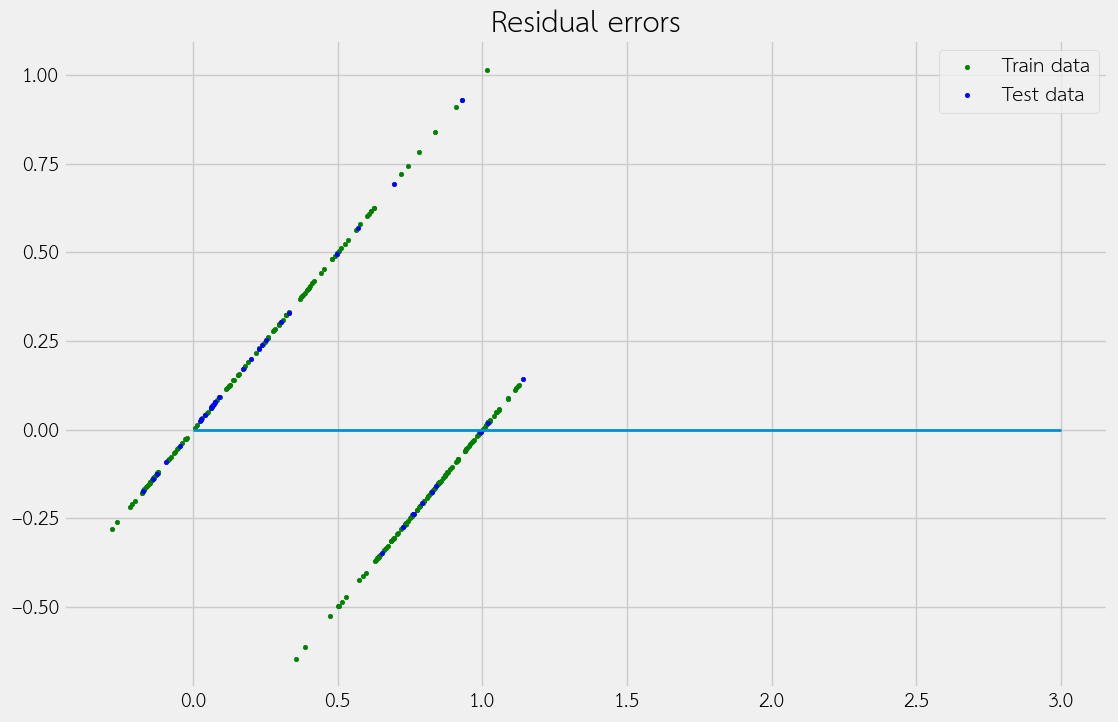

In [202]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train_res),
            reg.predict(X_train_res) - y3_train_res,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test_scaled),
            reg.predict(X_test_scaled) - y3_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=3, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

<ipython-input-203-c76afeb1c981>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


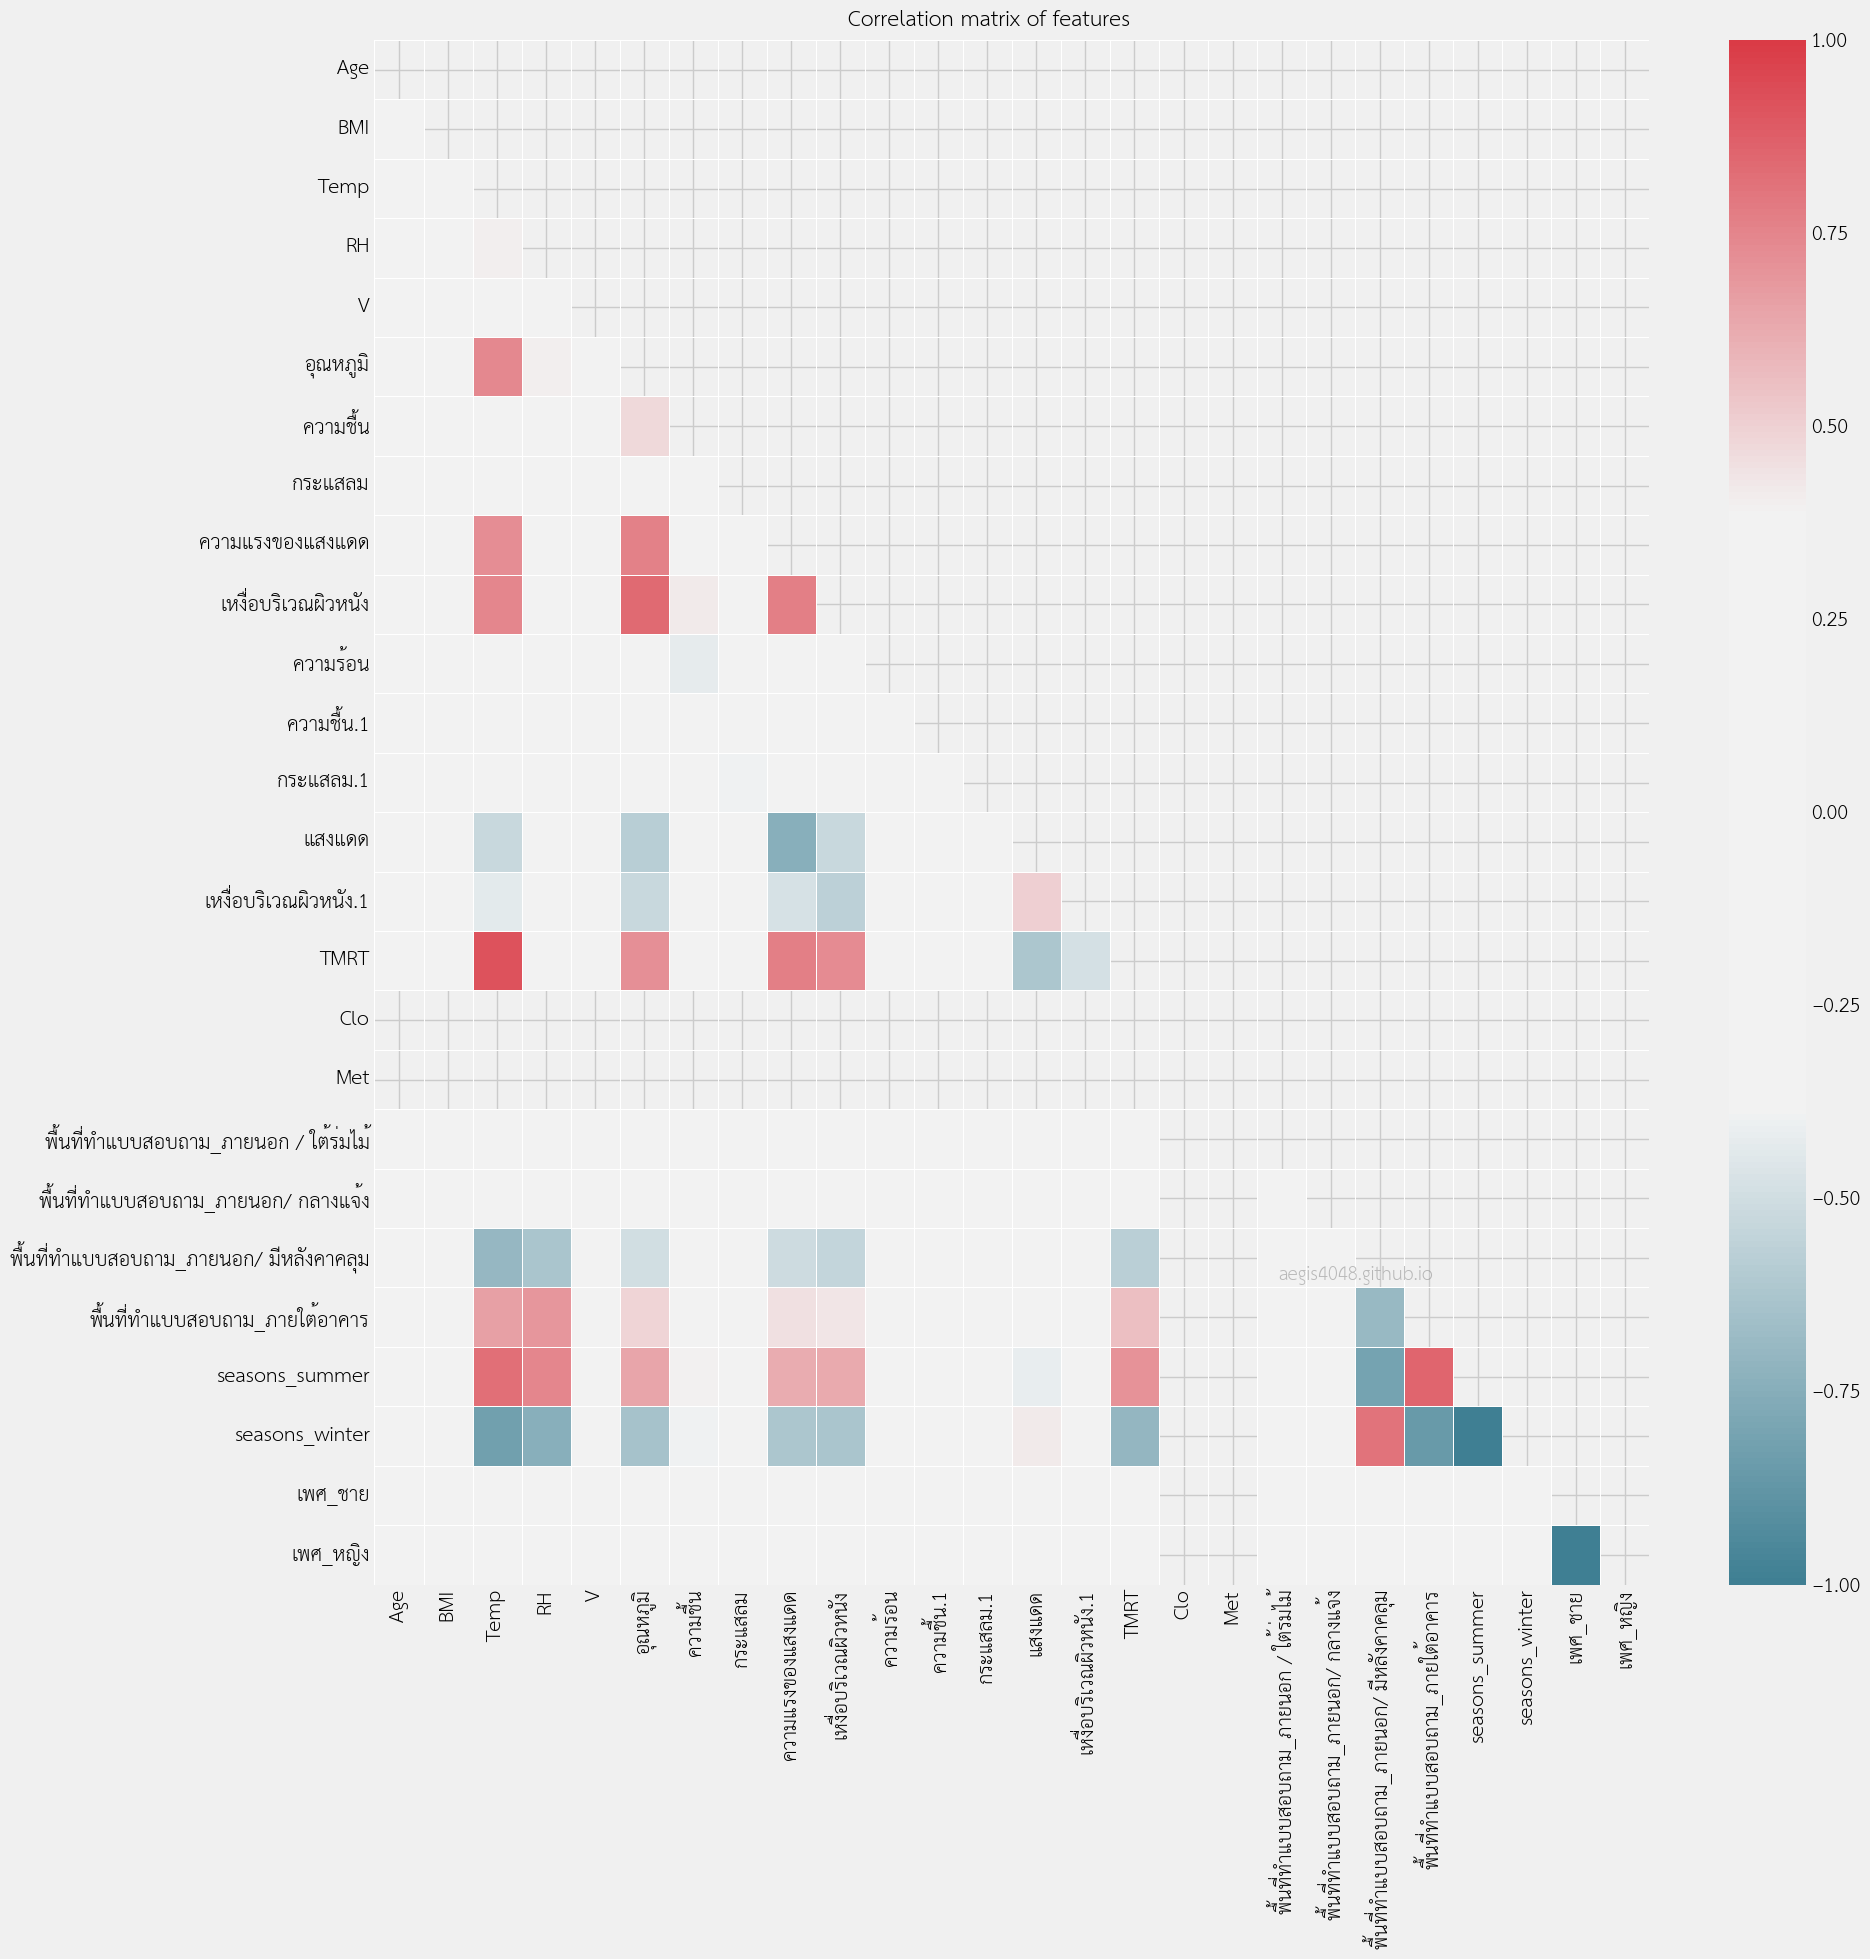

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

##Random Forest

In [82]:
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

###TSV 7 ค่า

In [83]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,2,3,4]
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train_res, y2_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [84]:
print("Best parameters :", clf.best_score_)
print("Best accuracy :", clf.best_params_)

Best parameters : 0.9999935050391937
Best accuracy : {'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}


In [86]:
rdf_reg = RandomForestRegressor(max_depth = 3, max_features = 'auto', n_estimators = 100)

# Train the model
resultss = rdf_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = rdf_reg.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y3_test,y_pred))
print('MSE_train:', format(mean_squared_error(y2_train_res, resultss.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, resultss.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, resultss.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, resultss.predict(X_test_scaled))))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE_train: 0.0
MSE_test: 0.0
MAE_train: 0.0
MAE_test: 0.0


###TSV 2 ค่า

In [204]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,2,3,4]
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train_res, y3_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesR

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [205]:
print("Best parameters :", clf.best_score_)
print("Best accuracy :", clf.best_params_)

Best parameters : 0.24778274630783223
Best accuracy : {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 300}


In [206]:
rdf_reg = RandomForestRegressor(max_depth = 4, max_features = 'auto', n_estimators = 300)

# Train the model
resultss = rdf_reg.fit(X_train_res, y3_train_res)

# Make predictions on the test set
y_pred = rdf_reg.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y3_test,y_pred))
print('MSE_train:', format(mean_squared_error(y3_train_res, resultss.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y3_test, resultss.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y3_train_res, resultss.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y3_test, resultss.predict(X_test_scaled))))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


MSE_train: 0.019980944603191483
MSE_test: 0.06515300660431371
MAE_train: 0.0630510726933275
MAE_test: 0.12915065422340027


###Plot Random Forest

In [87]:
!pip install dtreeviz
!apt-get install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [88]:
import dtreeviz # will be used for tree visualization

In [89]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
#from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

TSV 7 ค่า

In [90]:
rdf_reg = RandomForestRegressor(max_depth = 3, max_features = 'auto', n_estimators = 100)

# Train the model
resultss = rdf_reg.fit(X_train_res, y2_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


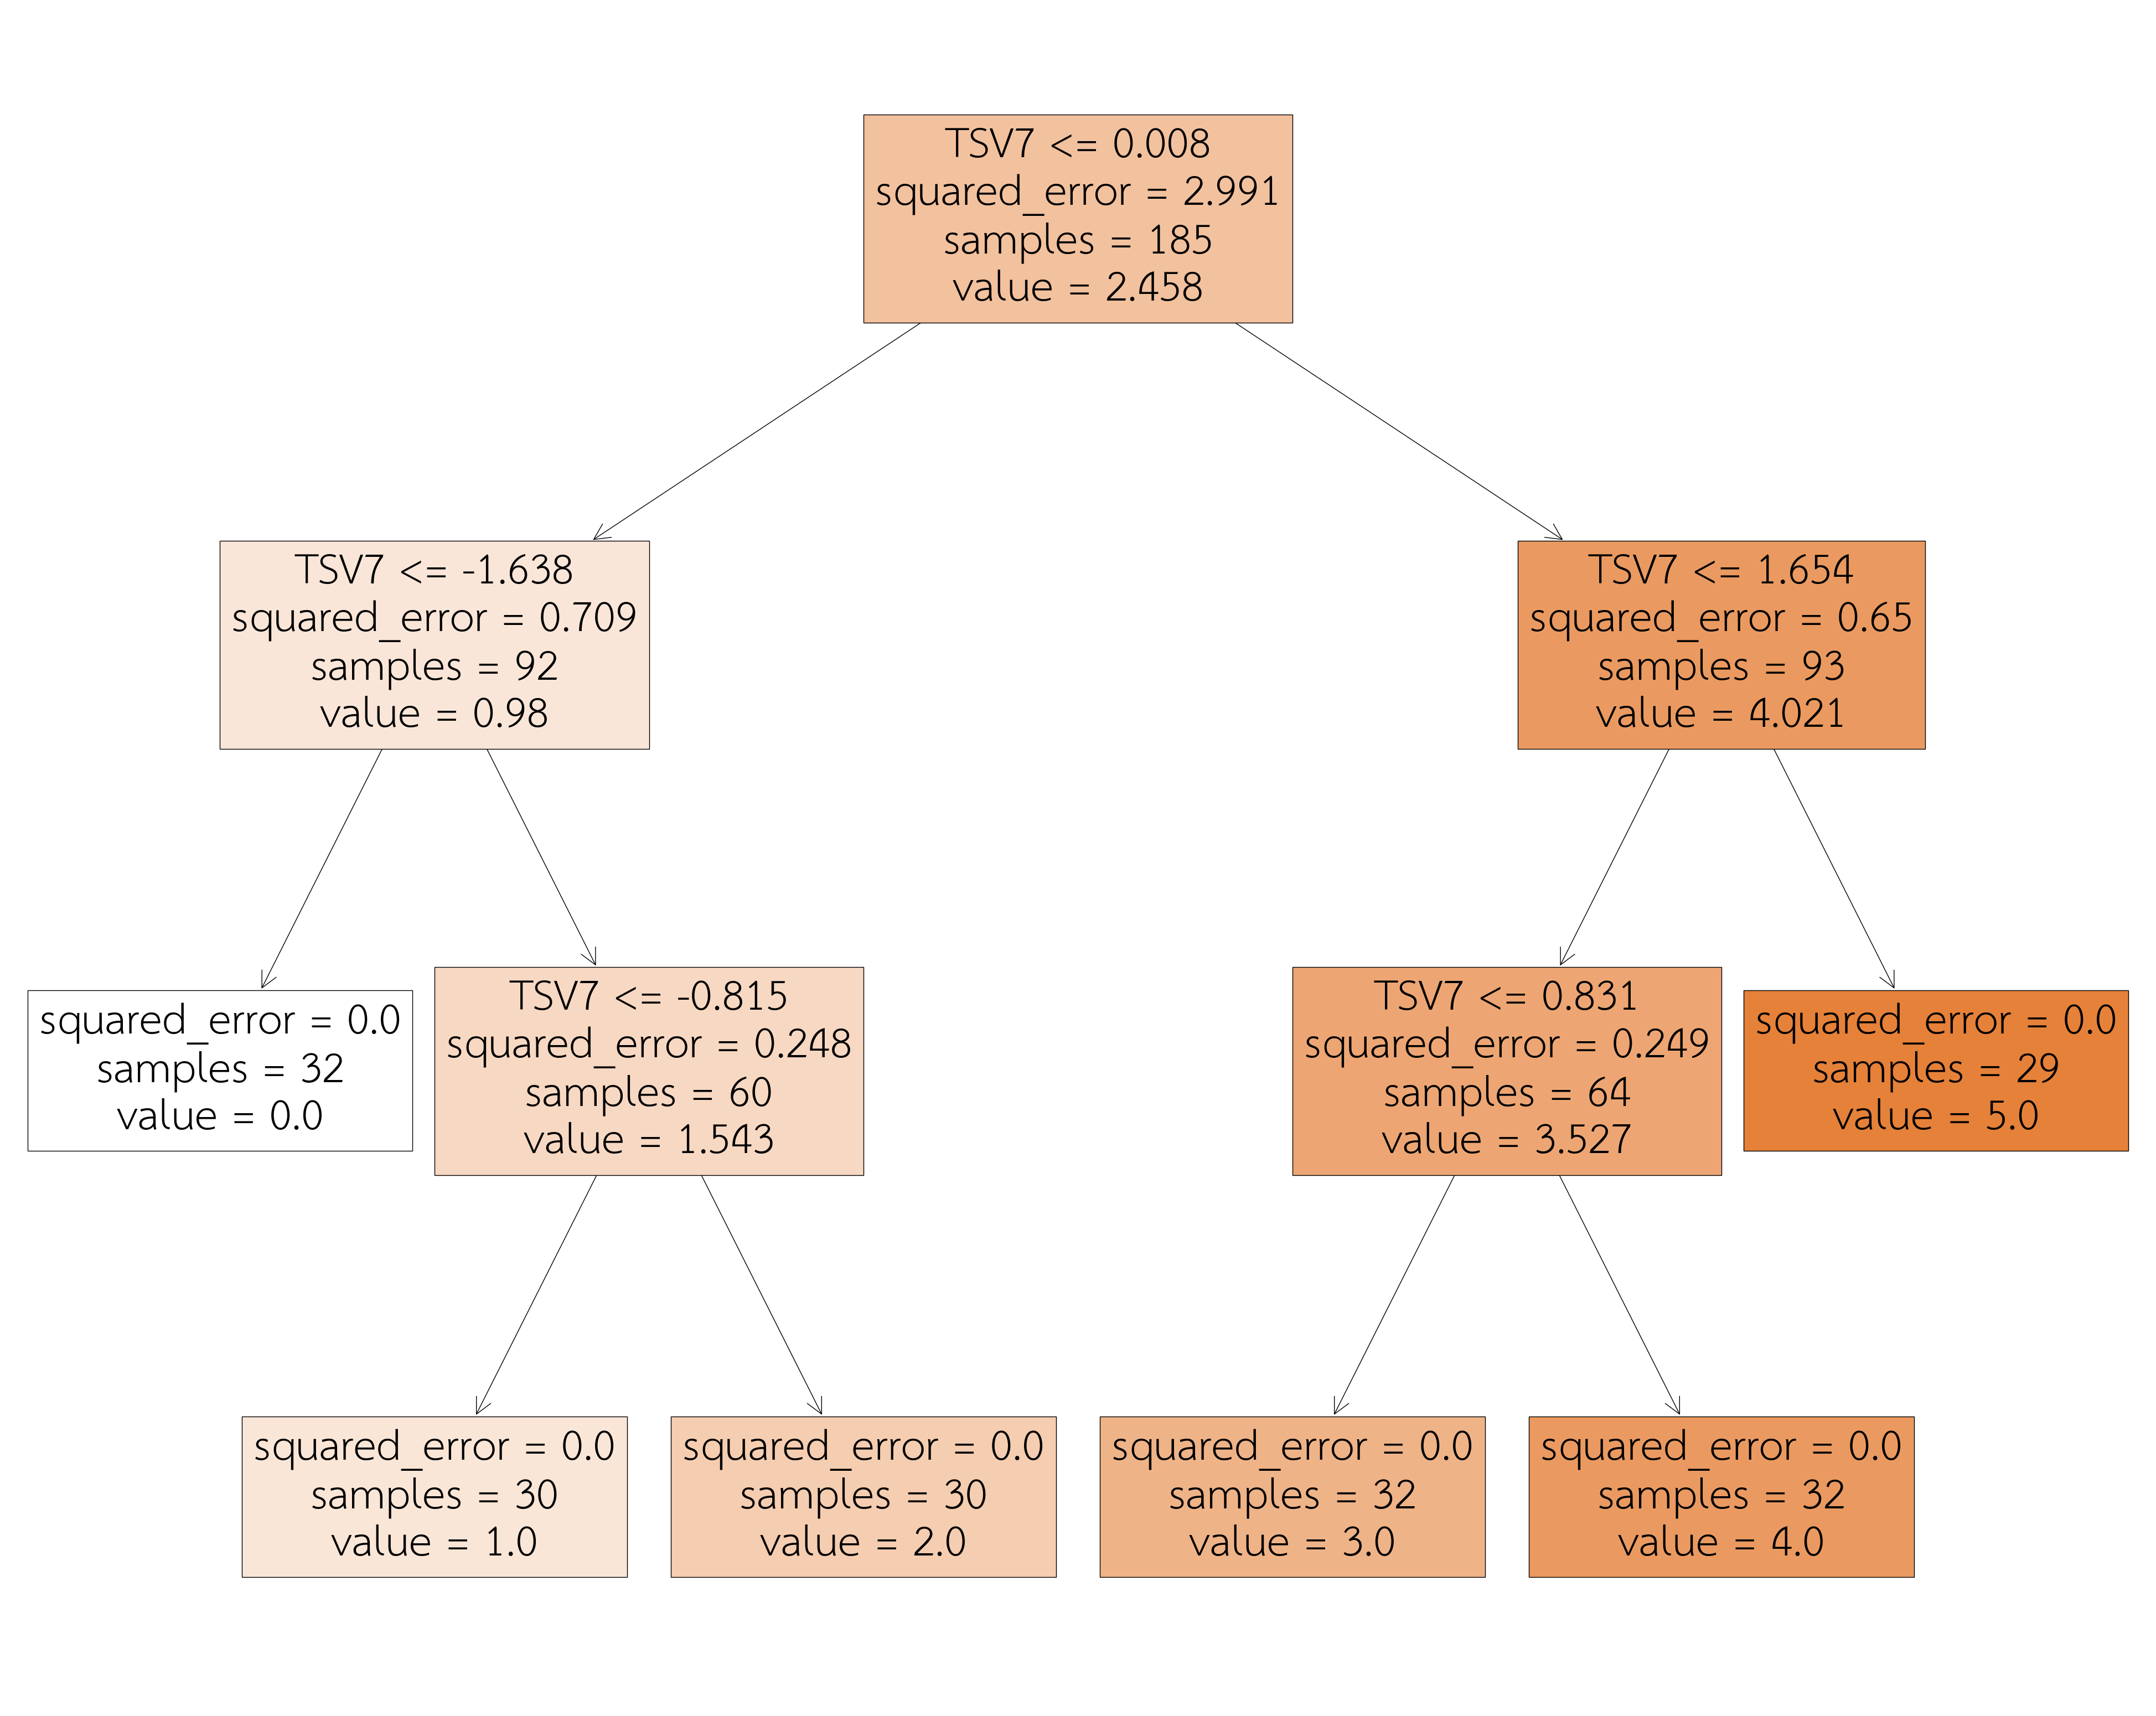

In [98]:
plt.figure(figsize=(50,40))
_ = tree.plot_tree(rdf_reg.estimators_[0], feature_names=X.columns, filled=True)

In [ ]:
len(resultss.estimators_)

100

In [ ]:
resultss.estimators_[0].tree_.max_depth

4

TSV 2 ค่า

In [207]:
rdf_reg = RandomForestRegressor(max_depth = 4, max_features = 'auto', n_estimators = 300)

# Train the model
resultss = rdf_reg.fit(X_train_res, y3_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


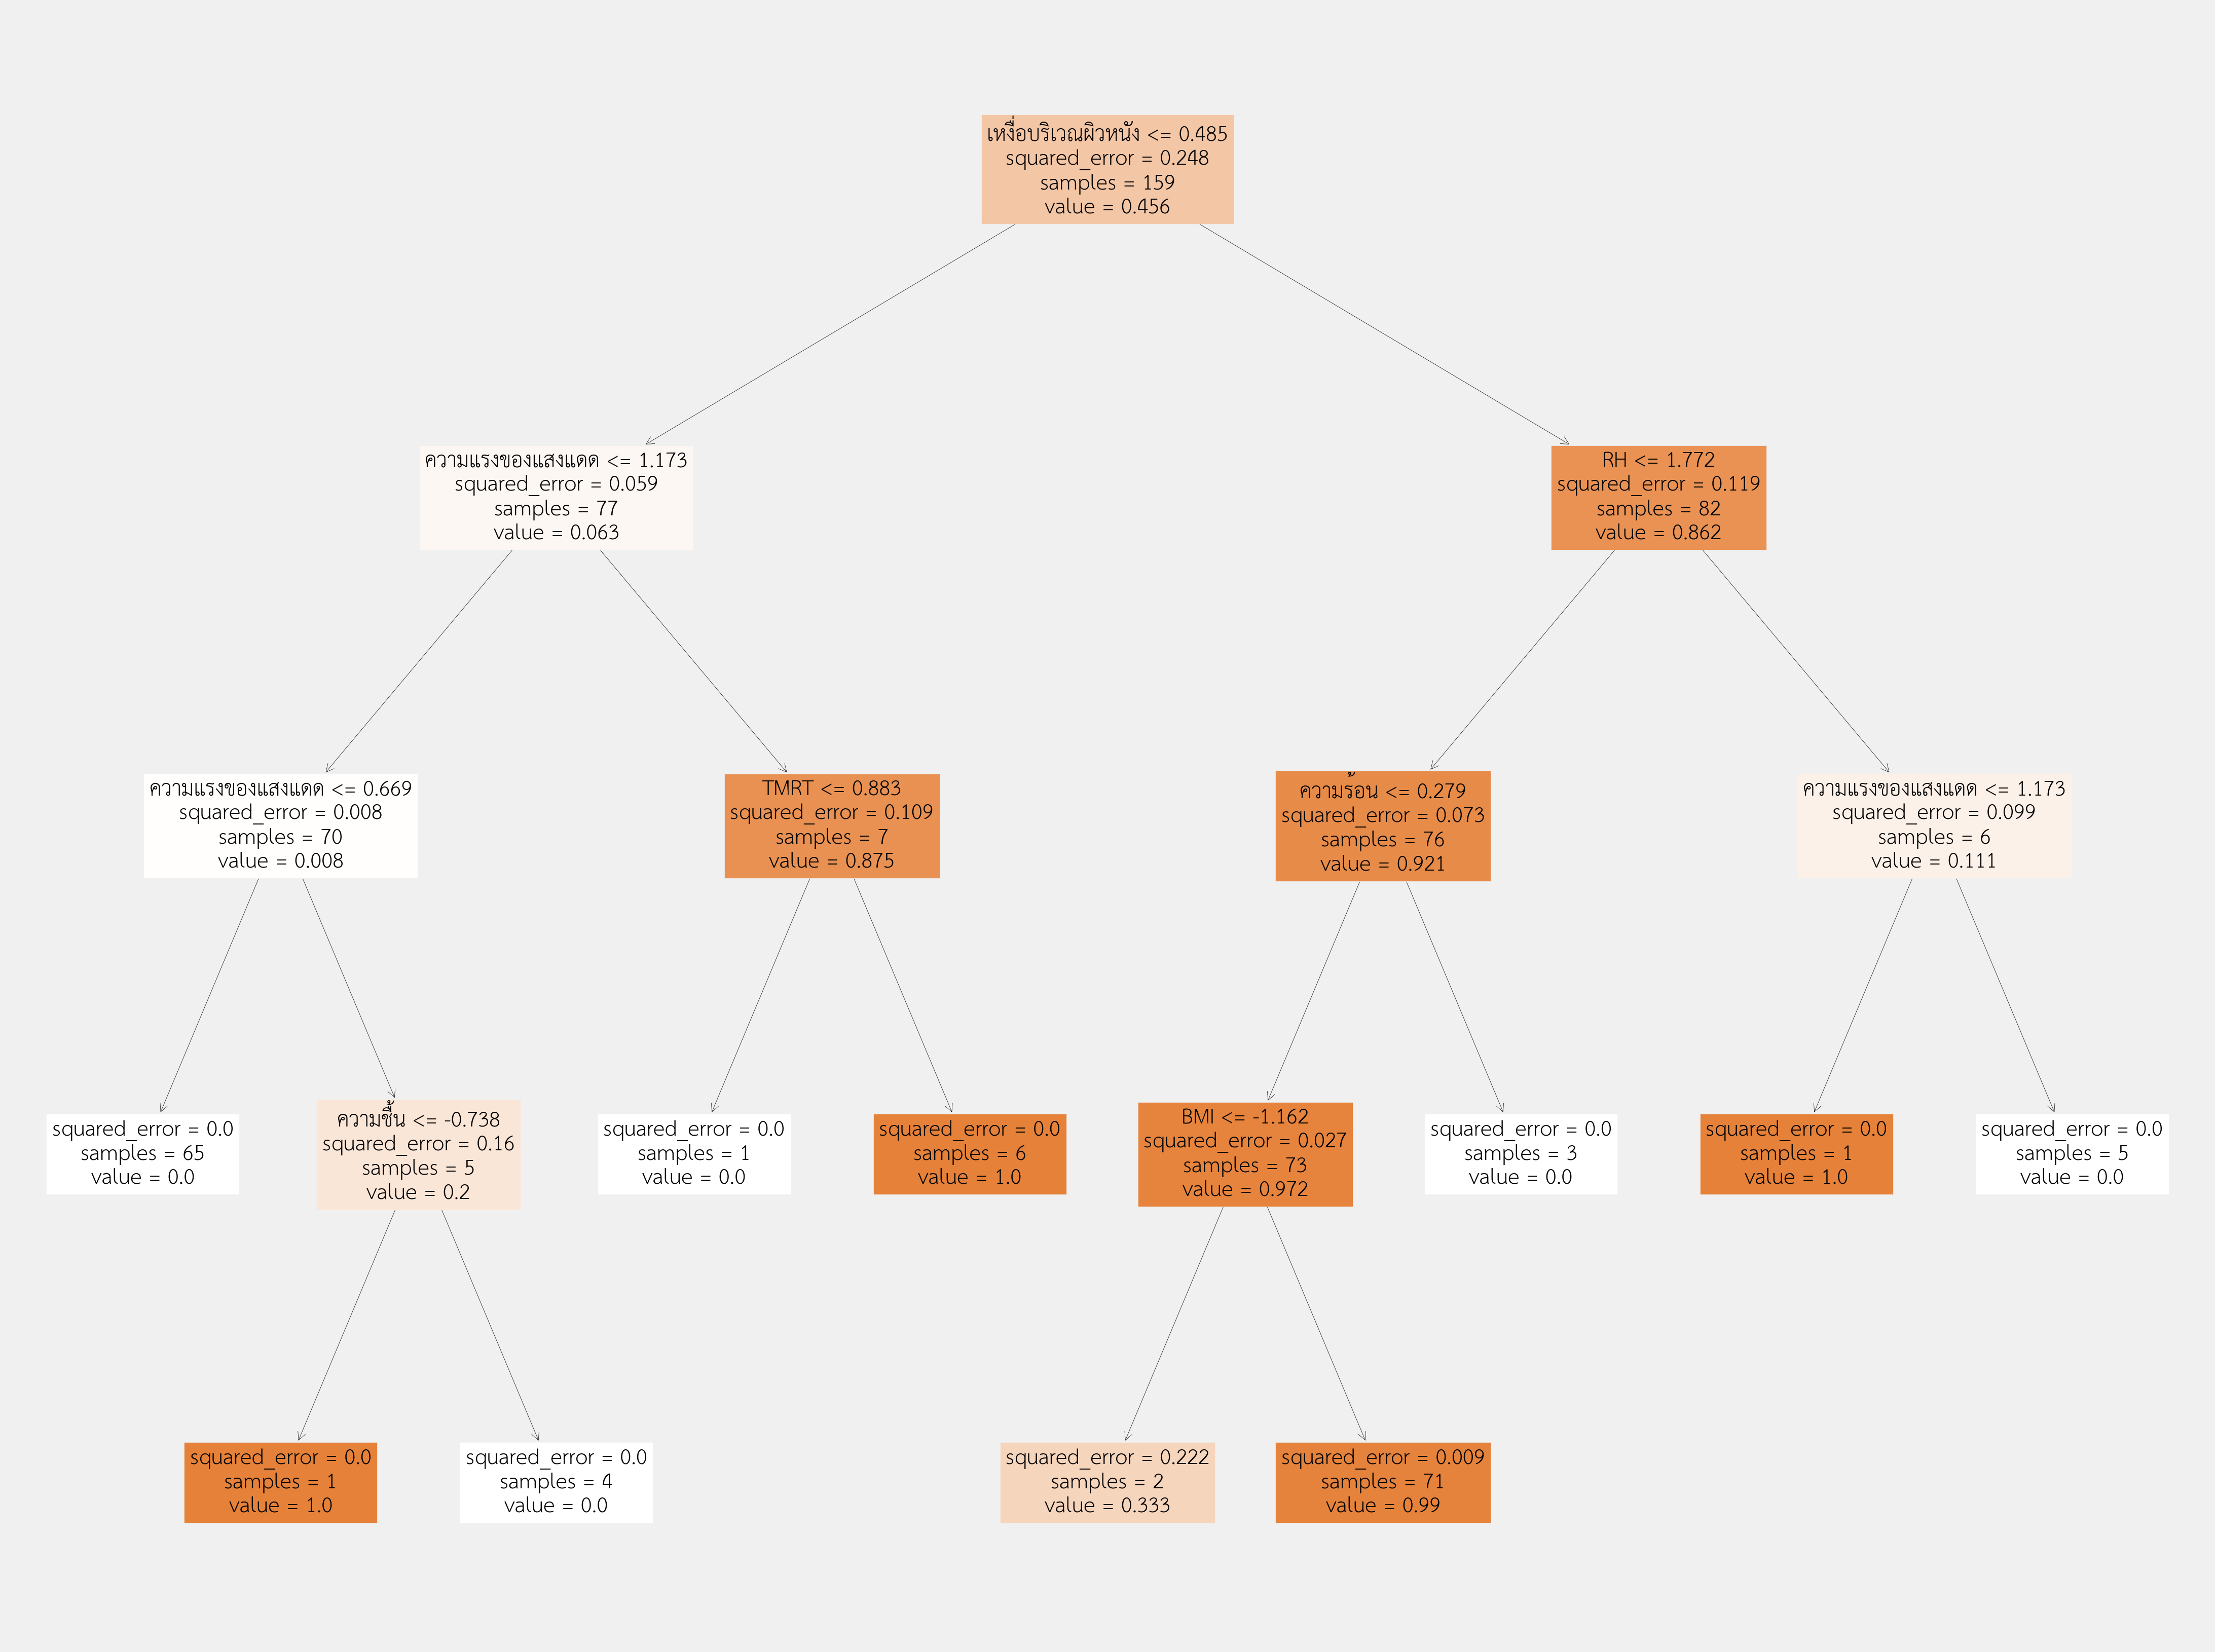

In [208]:
plt.figure(figsize=(50,40))
_ = tree.plot_tree(rdf_reg.estimators_[0], feature_names=X.columns, filled=True)